In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

from generic_data import GenericDataset
from SimpleNNs import OneNet, TwoNet

from scipy.interpolate import BSpline

In [2]:
# Seeds 0, 132 similar
# Seeds 2, 10 similar
seed = 1
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
# BSpline parameters
# knots
t = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 6/6]
# coefficients
c = [-1/6, 0, 2/6, -1/6]
# degree
k = 2

spl = BSpline(t, c, k, extrapolate=True)

In [4]:
# Generate spline training set
Xtrain = np.linspace(0, 1, 300)
np.random.shuffle(Xtrain)
Ytrain = spl(Xtrain)

In [5]:
# generate spline test set
Xtest = np.linspace(0, 1, 50)
Ytest = spl(Xtest)

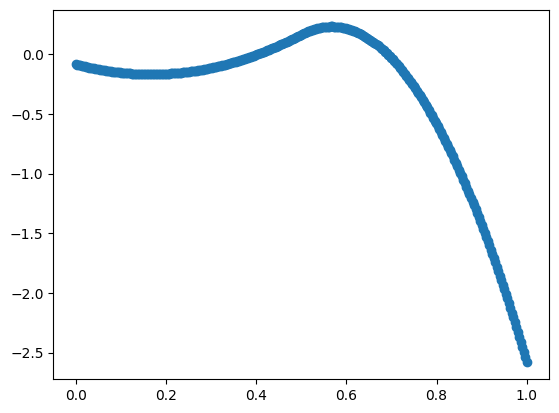

In [6]:
plt.scatter(Xtrain, Ytrain)
plt.show()

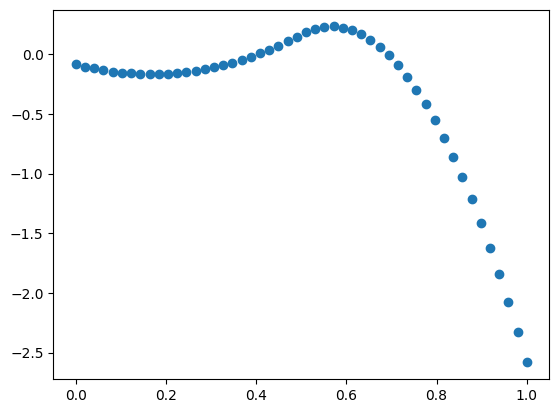

In [7]:
plt.scatter(Xtest, Ytest)
plt.show()

In [8]:
train_dataset = GenericDataset(Xtrain.reshape(-1,1), Ytrain.reshape(-1,1))
test_dataset = GenericDataset(Xtest.reshape(-1,1), Ytest.reshape(-1,1))

In [9]:
# Define model parameters
input_size = 1
output_size = 1
hidden_size = 100
shuffle=False

# Define training parameters
epochs = 100
lr = 0.05
batch_size = 10

In [10]:
model=OneNet(input_size, output_size, hidden_size)

In [11]:
# Train OneNet
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=shuffle)

In [12]:
LOSS=[]

model = model.double()
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

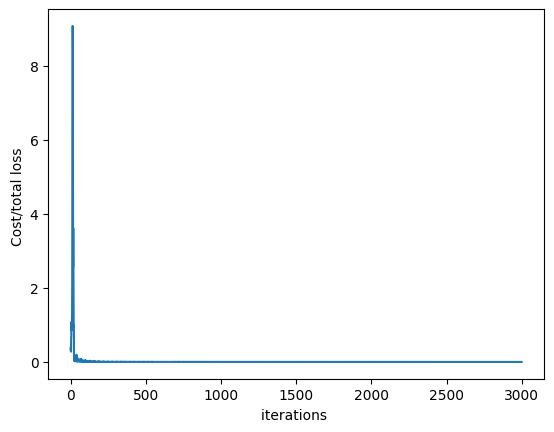

In [13]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [14]:
model.eval()
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=shuffle)

preds = []
labels = []
    
for batch_vec, batch_labels in iter(test_loader):
    batch_outputs = model(batch_vec)
    batch_preds = batch_outputs.cpu().detach().numpy()
    batch_labels = batch_labels.numpy()
    preds.append(batch_preds)
    labels.append(batch_labels)

preds = np.concatenate(preds)
labels = np.concatenate(labels)

In [15]:
# Compute regression error
regression_error = np.square(np.subtract(preds, labels)).mean()
regression_error

0.0012592463873629298

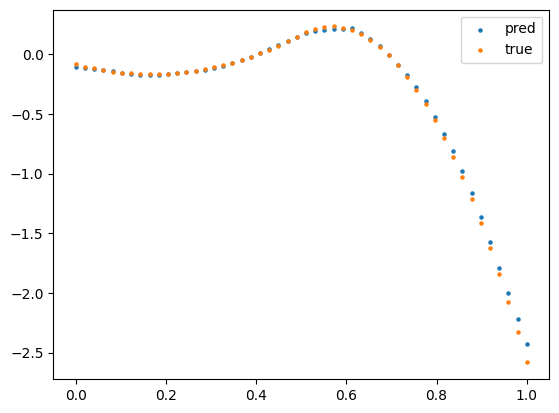

In [16]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds, label='pred', s=5)
ax.scatter(Xtest, Ytest, label='true', s=5)
ax.legend()
plt.show()

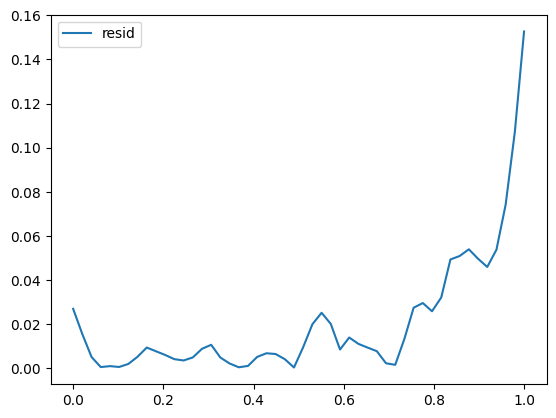

In [17]:
# Residual plot
fig, ax = plt.subplots()

ax.plot(Xtest, np.abs(preds - Ytest.reshape(-1,1)), label='resid')
ax.legend()
plt.show()

In [18]:
# TwoNet
model2=TwoNet(input_size, output_size, hidden_size)

In [19]:
# Train TwoNet
optimizer2 = optim.SGD(model2.parameters(), lr=lr)
criterion2 = nn.MSELoss()
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=shuffle)

In [20]:
LOSS2=[]

model2 = model2.double()
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model2(x)
        #calculate the loss
        loss=criterion2(yhat,y)
        #store loss/cost 
        LOSS2.append(loss.item())
        #clear gradient 
        optimizer2.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer2.step()

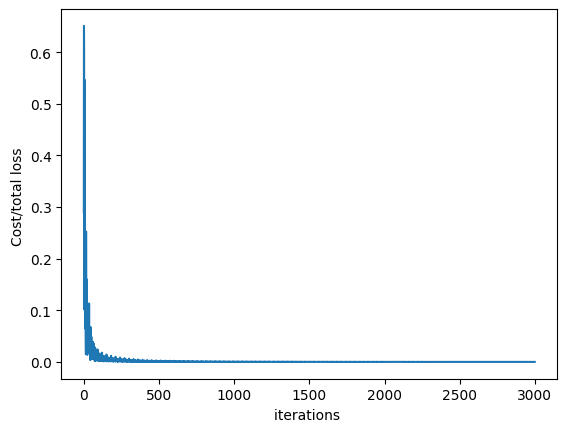

In [21]:
plt.plot(LOSS2)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [22]:
model2.eval()
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=shuffle)

preds = []
labels = []
    
for batch_vec, batch_labels in iter(test_loader):
    batch_outputs = model2(batch_vec)
    batch_preds = batch_outputs.cpu().detach().numpy()
    batch_labels = batch_labels.numpy()
    preds.append(batch_preds)
    labels.append(batch_labels)

preds = np.concatenate(preds)
labels = np.concatenate(labels)

In [23]:
# Compute regression error
regression_error = np.square(np.subtract(preds, labels)).mean()
regression_error

0.0011220424422412258

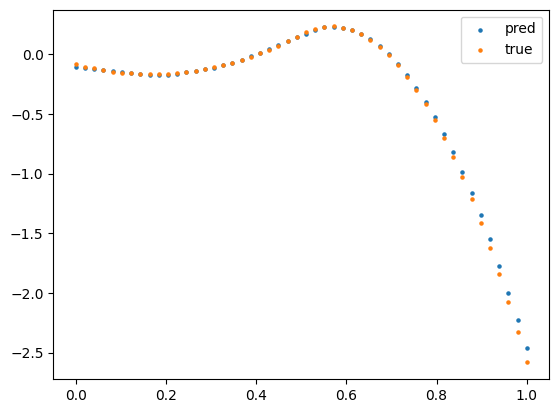

In [24]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds, label='pred', s=5)
ax.scatter(Xtest, Ytest, label='true', s=5)
ax.legend()
plt.show()

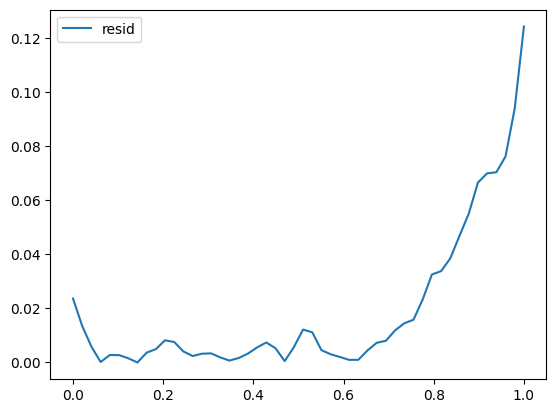

In [25]:
# Residual plot
fig, ax = plt.subplots()

ax.plot(Xtest, np.abs(preds - Ytest.reshape(-1,1)), label='resid')
ax.legend()
plt.show()